In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/프로그래밍 언어 공부 자료/인공지능/2022 데청캠/기업 프로젝트/데이터/최종 데이터셋(원본에서 포인트 찾기 위한 파일).xlsx")
df

,Unnamed: 0,Unnamed: 0.1,LOTID,공정(번호),시차(초),개수,총 리드타임,날짜,품명(코드화),품명,전체공정,고객사
0,0,0,N1803120140100,5166.666667,5.778593e+05,50.0,11557.186667,2018-05-10 11:03:22.407,BU-TCS-11940-00-0-04,Triton Ch Slid Lift Base Under AL6061각재,MCT > 후처리 > 입고처리,BU
1,1,1,N1803120180100,4375.000000,6.318738e+05,50.0,12637.475000,2018-10-17 15:38:19.880,BU-TCS-11940-00-0-10,Triton Ch Slid Worm Cover-4 AL6061봉재,CNC > MCT > 후처리 > 입고처리,BU
2,2,2,N1803140150100,2500.000000,3.052445e+05,15.0,20349.635000,2018-05-24 13:42:27.630,BU-BNR-12841-00-2-04,BURNER COOLING COVER SUS 304 FLANGE,CNC > MCT > 세정 > 입고처리,BU
3,3,3,N1803140150200,2500.000000,3.049215e+05,7.0,43560.215000,2018-05-24 13:42:41.740,BU-BNR-12841-00-2-04,BURNER COOLING COVER SUS 304 FLANGE,CNC > MCT > 세정 > 입고처리,BU
4,4,4,N1804030040100,3666.666667,1.152435e+06,30.0,38414.490000,2018-05-30 09:52:43.887,BU-TCS-11940-00-0-08,Triton Ch Slid Worm Cover-2 AL6061봉재,CNC > MCT > 후처리 > 입고처리,BU
...,...,...,...,...,...,...,...,...,...,...,...,...
36334,36334,36464,N2204270350100,3000.000000,1.633000e+03,6.0,272.170000,2022-04-28 14:57:19.157,BU-BLD-23060-00-1-01,BLADE,MCT > 입고처리,BU
36335,36335,36465,N2204270370100,3000.000000,2.061800e+04,120.0,171.820000,2022-05-03 08:49:49.777,AY-KSW-SRING-00-0-02,SUS RING-2,CNC > 세정 > 입고처리,AY
36336,36336,36466,N2204270830100,5000.000000,2.975200e+04,16.0,1859.500000,2022-05-02 21:51:57.030,BU-KSW-GHUD0-00-1,GEAR UNDER HOUSING ASSY-W,용접 > 후처리 > 입고처리,BU
36337,36337,36467,N2204270840100,5000.000000,2.974500e+04,16.0,1859.060000,2022-05-02 21:52:04.607,BU-KSW-GHUP0-00-1,GEAR UPPER HOUSING ASSY-W,용접 > 후처리 > 입고처리,BU


In [ ]:
df = df.drop("Unnamed: 0.1", axis = 1)
df

,Unnamed: 0,LOTID,공정(번호),시차(초),개수,총 리드타임,날짜,품명(코드화),품명,전체공정,고객사
0,0,N1803120140100,5166.666667,5.778593e+05,50.0,11557.186667,2018-05-10 11:03:22.407,BU-TCS-11940-00-0-04,Triton Ch Slid Lift Base Under AL6061각재,MCT > 후처리 > 입고처리,BU
1,1,N1803120180100,4375.000000,6.318738e+05,50.0,12637.475000,2018-10-17 15:38:19.880,BU-TCS-11940-00-0-10,Triton Ch Slid Worm Cover-4 AL6061봉재,CNC > MCT > 후처리 > 입고처리,BU
2,2,N1803140150100,2500.000000,3.052445e+05,15.0,20349.635000,2018-05-24 13:42:27.630,BU-BNR-12841-00-2-04,BURNER COOLING COVER SUS 304 FLANGE,CNC > MCT > 세정 > 입고처리,BU
3,3,N1803140150200,2500.000000,3.049215e+05,7.0,43560.215000,2018-05-24 13:42:41.740,BU-BNR-12841-00-2-04,BURNER COOLING COVER SUS 304 FLANGE,CNC > MCT > 세정 > 입고처리,BU
4,4,N1804030040100,3666.666667,1.152435e+06,30.0,38414.490000,2018-05-30 09:52:43.887,BU-TCS-11940-00-0-08,Triton Ch Slid Worm Cover-2 AL6061봉재,CNC > MCT > 후처리 > 입고처리,BU
...,...,...,...,...,...,...,...,...,...,...,...
36334,36334,N2204270350100,3000.000000,1.633000e+03,6.0,272.170000,2022-04-28 14:57:19.157,BU-BLD-23060-00-1-01,BLADE,MCT > 입고처리,BU
36335,36335,N2204270370100,3000.000000,2.061800e+04,120.0,171.820000,2022-05-03 08:49:49.777,AY-KSW-SRING-00-0-02,SUS RING-2,CNC > 세정 > 입고처리,AY
36336,36336,N2204270830100,5000.000000,2.975200e+04,16.0,1859.500000,2022-05-02 21:51:57.030,BU-KSW-GHUD0-00-1,GEAR UNDER HOUSING ASSY-W,용접 > 후처리 > 입고처리,BU
36337,36337,N2204270840100,5000.000000,2.974500e+04,16.0,1859.060000,2022-05-02 21:52:04.607,BU-KSW-GHUP0-00-1,GEAR UPPER HOUSING ASSY-W,용접 > 후처리 > 입고처리,BU


In [ ]:
df[(df["품명"] == "Inside Pipe") & (df["고객사"] == "AY")]

,Unnamed: 0,LOTID,공정(번호),시차(초),개수,총 리드타임,날짜,품명(코드화),품명,전체공정,고객사
447,447,N1809180190100,1000.000000,12.000000,2.0,6.000000,2018-09-18 16:38:19.593,AY-HCB-SHCT3-00-1-02,Inside Pipe,사상,AY
458,458,N1809190110100,1000.000000,483.000000,10.0,48.300000,2018-09-19 08:53:38.357,AY-MCB-SE412-00-1-06,Inside Pipe,사상,AY
1260,1260,N1811010060100,3000.000000,65.500000,100.0,0.655000,2018-11-01 09:57:56.137,AY-HCL-0SM08-01-1-02,Inside Pipe,CNC > 세정 > 입고처리,AY
1425,1425,N1811060820100,1000.000000,539.000000,100.0,5.390000,2018-11-06 13:38:23.727,AY-HCB-SHCT3-00-1-02,Inside Pipe,사상,AY
1450,1450,N1811061040100,1000.000000,445.000000,100.0,4.450000,2018-11-06 13:39:52.757,AY-HCB-S0703-00-1-04,Inside Pipe,사상,AY
...,...,...,...,...,...,...,...,...,...,...,...
34146,34146,N2202110090100,3366.666667,150745.666667,40.0,3768.643333,2022-02-24 13:52:34.890,AY-HCB-4UCB0-01-1-02,Inside Pipe,CNC > 세정 > 타각 > 입고처리,AY
34389,34389,N2202200340100,3000.000000,29031.333333,40.0,725.783333,2022-03-04 09:28:12.227,AY-WTC-4UTC0-01-1-02,Inside Pipe,CNC > MCT > 세정 > 입고처리,AY
34421,34421,N2202210260100,3366.666667,29154.333333,40.0,728.860000,2022-03-04 09:30:29.927,AY-HCB-4UCB0-01-1-02,Inside Pipe,CNC > 세정 > 타각 > 입고처리,AY
35312,35312,N2203221020100,3000.000000,1857.000000,20.0,92.850000,2022-04-04 09:35:39.773,AY-HCB-4RCB0-01-1-03,Inside Pipe,CNC > 세정 > 입고처리,AY


In [ ]:
# AY사  
df_Inside_Pipe = df[(df["품명"] == "Inside Pipe") & (df["고객사"] == "AY")]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51077 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_

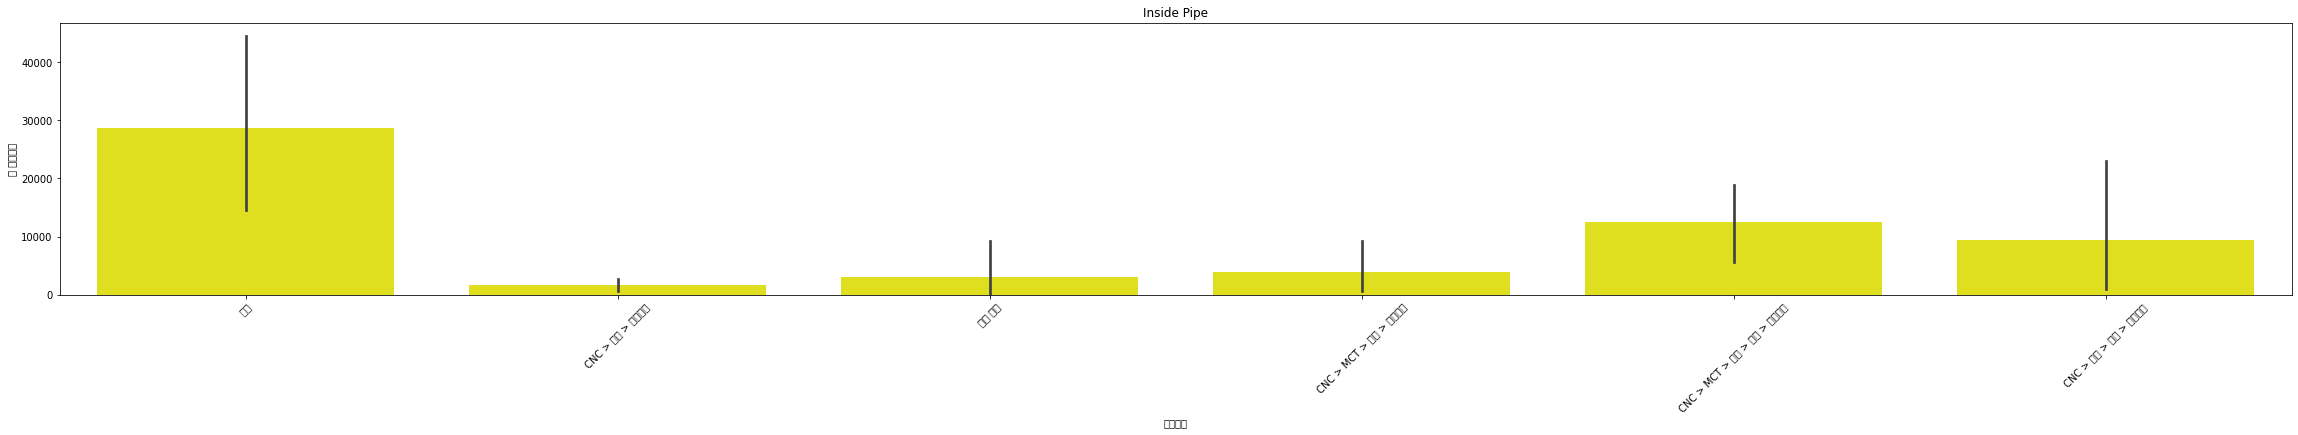

In [ ]:
plt.figure(figsize=(40, 5))
plt.xticks(rotation = 45)
plt.title("Inside Pipe")
sns.barplot(x = '전체공정', y = '총 리드타임', data=df_Inside_Pipe, color = "yellow")
plt.show()

[Text(0, 0, 'CNC > MCT > 세정 > 입고처리'),
 Text(0, 0, 'CNC > MCT > 세정 > 타각 > 입고처리'),
 Text(0, 0, 'CNC > 세정 > 입고처리'),
 Text(0, 0, 'CNC > 세정 > 타각 > 입고처리'),
 Text(0, 0, '사상'),
 Text(0, 0, '사상 세정')]

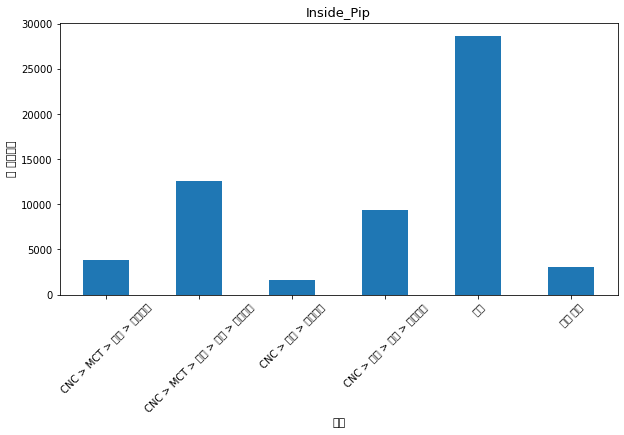

In [ ]:
#하나의 특성에 대한 범주 값들의 분포를 그래프로 출력

ot = df_Inside_Pipe.groupby('전체공정').mean()['총 리드타임']
plot = ot.plot(kind='bar',figsize=(10,5))
plot.set_xlabel('공정',fontsize=11)
plot.set_ylabel('총 리드타임',fontsize=11)
plot.set_title('Inside_Pip',fontsize=13)
plot.set_xticklabels(labels=ot.index,rotation=45)

In [ ]:
pd.DataFrame(df_Inside_Pipe.groupby(['품명', "전체공정"]).mean()["총 리드타임"])

총 리드타임
품명          전체공정                                    
Inside Pipe CNC > MCT > 세정 > 입고처리        3846.182593
            CNC > MCT > 세정 > 타각 > 입고처리  12542.033750
            CNC > 세정 > 입고처리              1577.099474
            CNC > 세정 > 타각 > 입고처리         9354.260556
            사상                          28695.181905
            사상 세정                        3104.197500

In [ ]:
df[(df["품명"] == "무산소동 ANODE") & (df["고객사"] == "BU")]

,Unnamed: 0,LOTID,공정(번호),시차(초),개수,총 리드타임,날짜,품명(코드화),품명,전체공정,고객사
5204,5204,N1905170530100,3066.666667,1.433333e+01,100.0,0.143333,2019-05-22 17:51:29.630,BU-AND-97990-00-0-01,무산소동 ANODE,CNC > MCT > IPA세정 > 입고처리,BU
9286,9286,N2002100030100,3066.666667,3.135737e+05,50.0,6271.473333,2020-02-21 11:06:36.303,BU-AND-97990-00-0-01,무산소동 ANODE,CNC > MCT > IPA세정 > 입고처리,BU
9707,9707,N2003170030100,3066.666667,1.559351e+06,50.0,27002.223333,2020-05-11 17:23:40.157,BU-AND-97990-00-0-01,무산소동 ANODE,CNC > MCT > IPA세정 > 입고처리,BU
9746,9746,N2003190010100,2000.000000,1.600000e+01,30.0,0.530000,2020-03-20 17:53:05.717,BU-AND-97990-00-0-01,무산소동 ANODE,CNC > MCT > IPA세정 > 입고처리,BU
10010,10010,N2004200170100,3066.666667,4.140613e+05,105.0,3943.443333,2020-05-11 17:23:42.300,BU-AND-97990-00-0-01,무산소동 ANODE,CNC > MCT > IPA세정 > 입고처리,BU
10470,10470,N2005210200100,3066.666667,3.367568e+06,30.0,112252.256667,2020-09-16 14:12:12.737,BU-AND-97990-00-0-01,무산소동 ANODE,CNC > MCT > IPA세정 > 입고처리,BU
18174,18174,N2012300020100,2000.000000,2.591860e+05,40.0,6479.650000,2021-01-11 12:05:41.173,BU-AND-97990-00-0-01,무산소동 ANODE,CNC > 입고처리,BU
18251,18251,N2101030340100,2000.000000,4.300000e+01,20.0,2.150000,2021-01-11 12:03:14.063,BU-AND-97990-00-0-01,무산소동 ANODE,CNC > 입고처리,BU
18419,18419,N2101070340100,2500.000000,4.304505e+05,36.0,11956.960000,2021-01-22 13:15:42.530,BU-AND-97990-00-0-01,무산소동 ANODE,CNC > MCT > 입고처리,BU
18420,18420,N2101070340101,2500.000000,4.332750e+04,64.0,676.995000,2021-01-13 14:12:12.890,BU-AND-97990-00-0-01,무산소동 ANODE,CNC > MCT > 입고처리,BU


In [ ]:
# BU사  
df_무산소동_ANODE = df[(df["품명"] == "무산소동 ANODE") & (df["고객사"] == "BU")]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_

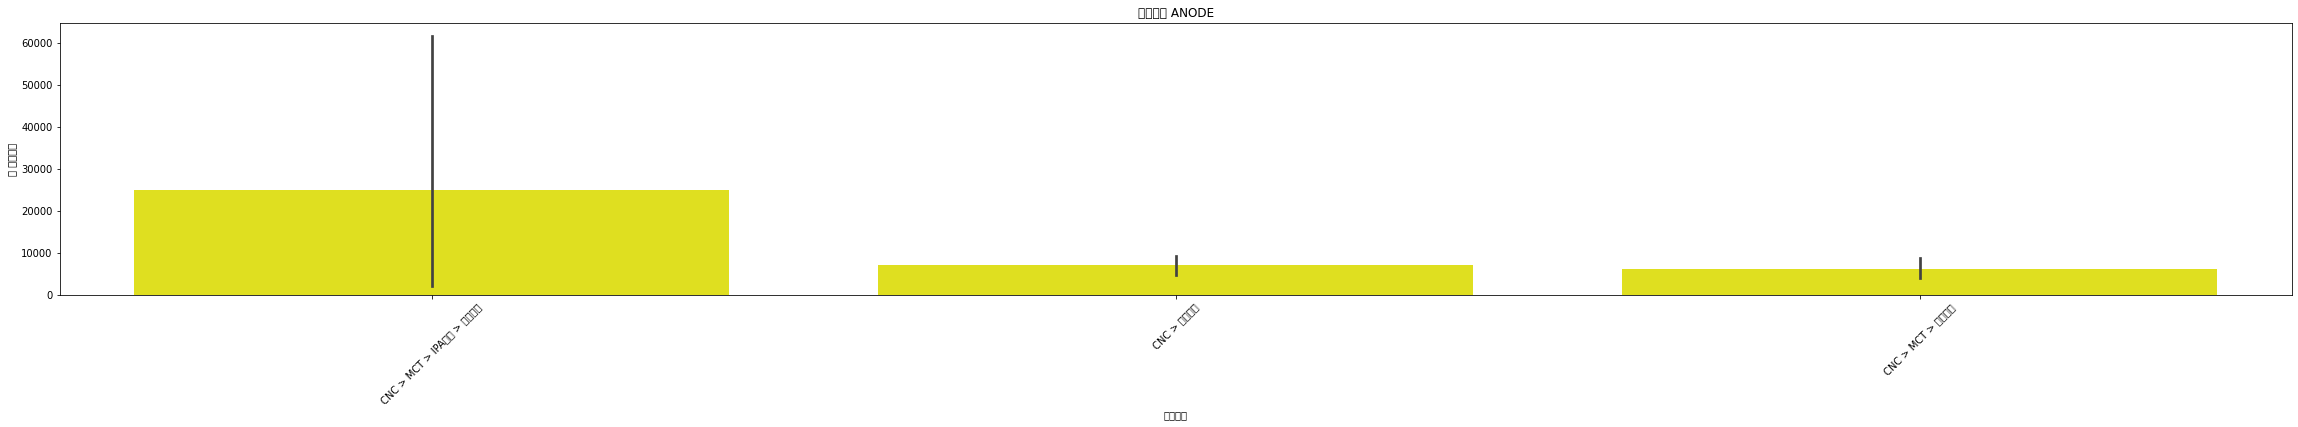

In [ ]:
plt.figure(figsize=(40, 5))
plt.xticks(rotation = 45)
plt.title("무산소동 ANODE")
sns.barplot(x = '전체공정', y = '총 리드타임', data=df_무산소동_ANODE, color = "yellow")
plt.show()

[Text(0, 0, 'CNC > MCT > IPA세정 > 입고처리'),
 Text(0, 0, 'CNC > MCT > 입고처리'),
 Text(0, 0, 'CNC > 입고처리')]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_te

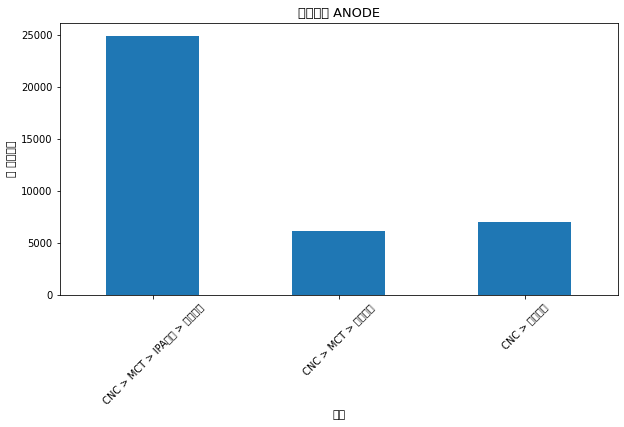

In [ ]:
ot = df_무산소동_ANODE.groupby('전체공정').mean()['총 리드타임']
plot = ot.plot(kind='bar',figsize=(10,5))
plot.set_xlabel('공정',fontsize=11)
plot.set_ylabel('총 리드타임',fontsize=11)
plot.set_title('무산소동 ANODE',fontsize=13)
plot.set_xticklabels(labels=ot.index,rotation=45)

In [ ]:
pd.DataFrame(df_무산소동_ANODE.groupby(['품명', "전체공정"]).mean()["총 리드타임"])

총 리드타임
품명         전체공정                                  
무산소동 ANODE CNC > MCT > IPA세정 > 입고처리  24911.678333
           CNC > MCT > 입고처리           6126.826400
           CNC > 입고처리                 6952.716111

In [ ]:
df[(df["품명"] == "Top Blade") & (df["고객사"] == "ZD")]

,Unnamed: 0,LOTID,공정(번호),시차(초),개수,총 리드타임,날짜,품명(코드화),품명,전체공정,고객사
10723,10723,N2006100040100,3500.0,1084.5,1.0,1084.500,2020-06-10 10:00:41.703,ZD-G10-D0000-00-1-01,Top Blade,MCT > 세정 > 입고처리,ZD
10959,10959,N2006180510100,3500.0,86894.0,100.0,868.940,2020-06-25 14:36:15.527,ZD-G07-D0000-00-1-01,Top Blade,MCT > 세정 > 입고처리,ZD
11067,11067,N2006260010100,3500.0,172736.5,60.0,2878.945,2020-07-03 09:49:43.607,ZD-G07-D0000-00-1-01,Top Blade,MCT > 세정 > 입고처리,ZD
11818,11818,N2007133160100,3500.0,5067.0,11.0,460.640,2020-07-14 15:05:24.290,ZD-G07-D0000-00-1-01,Top Blade,MCT > 세정 > 입고처리,ZD
11820,11820,N2007133180100,3500.0,5064.0,11.0,460.360,2020-07-14 15:05:27.870,ZD-G07-D0000-00-1-01,Top Blade,MCT > 세정 > 입고처리,ZD
...,...,...,...,...,...,...,...,...,...,...,...
34325,34325,N2202170210100,3000.0,220860.0,10.0,22086.000,2022-02-27 09:02:19.897,ZD-G13-D0000-03-1-01,Top Blade,MCT > 입고처리,ZD
35401,35401,N2203240120100,3500.0,39601.5,1.0,39601.500,2022-03-31 13:47:30.833,ZD-GA6-D0001-00-1-01,Top Blade,MCT > 세정 > 입고처리,ZD
35827,35827,N2204110220100,3500.0,48698.5,100.0,486.985,2022-04-22 16:59:54.857,ZD-GA6-D0000-01-1-01,Top Blade,MCT > 세정 > 입고처리,ZD
36131,36131,N2204190340100,3000.0,150904.0,10.0,15090.400,2022-04-30 10:21:46.883,ZD-G13-D0000-03-1-01,Top Blade,MCT > 입고처리,ZD


In [ ]:
# ZD사
df_TOP_Blade = df[(df["품명"] == "Top Blade") & (df["고객사"] == "ZD")]

[Text(0, 0, 'CNC > MCT > 세정 > 입고처리'),
 Text(0, 0, 'MCT > 세정 > 입고처리'),
 Text(0, 0, 'MCT > 입고처리'),
 Text(0, 0, 'MCT > 후처리 > 입고처리'),
 Text(0, 0, '후처리 > MCT > 후처리2차 > 입고처리')]

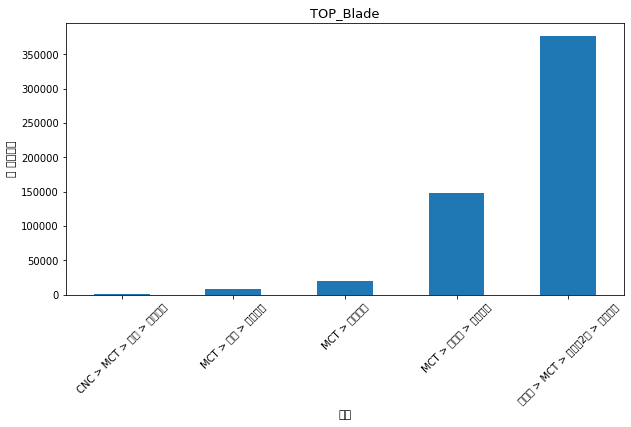

In [ ]:
ot = df_TOP_Blade.groupby('전체공정').mean()['총 리드타임']
plot = ot.plot(kind='bar',figsize=(10,5))
plot.set_xlabel('공정',fontsize=11)
plot.set_ylabel('총 리드타임',fontsize=11)
plot.set_title('TOP_Blade',fontsize=13)
plot.set_xticklabels(labels=ot.index,rotation=45)

In [ ]:
pd.DataFrame(df_TOP_Blade.groupby(['품명', "전체공정"]).mean()["총 리드타임"])

총 리드타임
품명        전체공정                                   
Top Blade CNC > MCT > 세정 > 입고처리       1512.774211
          MCT > 세정 > 입고처리             7960.944800
          MCT > 입고처리                 19185.600000
          MCT > 후처리 > 입고처리          147285.067143
          후처리 > MCT > 후처리2차 > 입고처리  377012.611667

In [ ]:
# DP사  
df_Side_Frame = df[(df["품명"] == "Side Frame") & (df["고객사"] == "DP")]

[Text(0, 0, 'CNC > MCT > IPA세정 > 입고처리'),
 Text(0, 0, 'CNC > MCT > 입고처리'),
 Text(0, 0, 'CNC > 입고처리')]

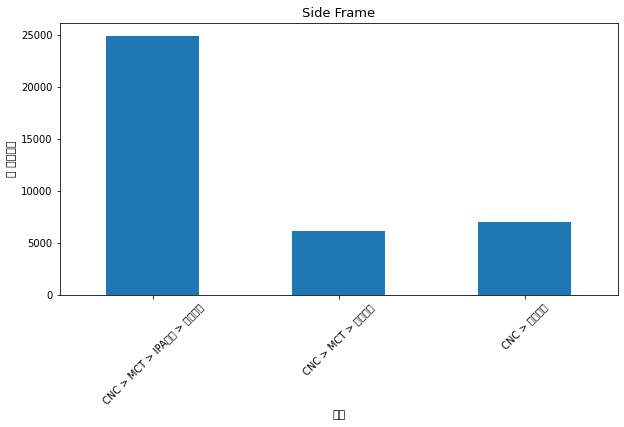

In [ ]:
ot = df_무산소동_ANODE.groupby('전체공정').mean()['총 리드타임']
plot = ot.plot(kind='bar',figsize=(10,5))
plot.set_xlabel('공정',fontsize=11)
plot.set_ylabel('총 리드타임',fontsize=11)
plot.set_title('Side Frame',fontsize=13)
plot.set_xticklabels(labels=ot.index,rotation=45)

In [ ]:
pd.DataFrame(df_Side_Frame.groupby(['품명', "전체공정"]).mean()["총 리드타임"])

총 리드타임
품명         전체공정                                     
Side Frame MCT > 세정 > 입고처리               2908.957368
           Valve (구매품) 품질검사 > 입고처리       1161.436667
           Valve MCT > 세정 > 품질검사 > 입고처리  1437.984103
           Valve 세정 > 사상 > 품질검사 > 입고처리    660.000000

In [ ]:
df[(df["품명"] == "REC SOCKET") & (df["고객사"] == "KT")]

,Unnamed: 0,LOTID,공정(번호),시차(초),개수,총 리드타임,날짜,품명(코드화),품명,전체공정,고객사
24197,24197,N2106300130100,3500.0,3757.000000,2.0,1878.500000,2021-07-05 16:21:14.270,KT-MCB-41192-00-1-06,REC SOCKET,MCT > 세정 > 입고처리,KT
24202,24202,N2106300190100,3500.0,110.000000,2.0,55.000000,2021-06-30 16:18:38.087,KT-MCB-41192-00-1-06,REC SOCKET,MCT > 세정 > 입고처리,KT
24608,24608,N2107080630100,3500.0,4817.500000,2.0,2408.750000,2021-07-09 19:35:37.340,KT-MCB-61259-04-1-07,REC SOCKET,MCT > 세정 > 입고처리,KT
24646,24646,N2107081020100,3500.0,2201.000000,6.0,366.835000,2021-07-12 10:28:29.143,KT-RCH-61004-00-1-09,REC SOCKET,MCT > 세정 > 입고처리,KT
24647,24647,N2107081030100,3500.0,2128.500000,6.0,354.750000,2021-07-12 10:28:20.807,KT-MCB-41192-00-1-06,REC SOCKET,MCT > 세정 > 입고처리,KT
24670,24670,N2107081230100,3000.0,397.666667,27.0,14.730000,2021-07-12 16:34:29.337,KT-MCB-41192-00-1-06,REC SOCKET,CNC > MCT > 세정 > 입고처리,KT
24671,24671,N2107081240100,3000.0,832.333333,29.0,28.703333,2021-07-12 16:34:23.297,KT-RCH-61004-00-1-09,REC SOCKET,CNC > MCT > 세정 > 입고처리,KT
29376,29376,N2110260410100,3000.0,58935.666667,3.0,19645.223333,2021-11-01 09:37:51.017,KT-MCB-41192-00-1-06,REC SOCKET,CNC > MCT > 세정 > 입고처리,KT
29377,29377,N2110260420100,3000.0,58953.666667,3.0,19651.223333,2021-11-01 09:37:57.363,KT-RCH-61004-00-1-09,REC SOCKET,CNC > MCT > 세정 > 입고처리,KT
29431,29431,N2110260930100,3000.0,284636.000000,8.0,35579.503333,2021-11-05 11:44:17.750,KT-RCH-61004-00-1-09,REC SOCKET,CNC > MCT > 세정 > 입고처리,KT


In [ ]:
# KT사  
df_REC_SOCKET = df[(df["품명"] == "REC SOCKET") & (df["고객사"] == "KT")]

[Text(0, 0, 'CNC > MCT > 세정 > 입고처리'),
 Text(0, 0, 'CNC > 세정 > 입고처리'),
 Text(0, 0, 'MCT > 세정 > 입고처리')]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51077 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_

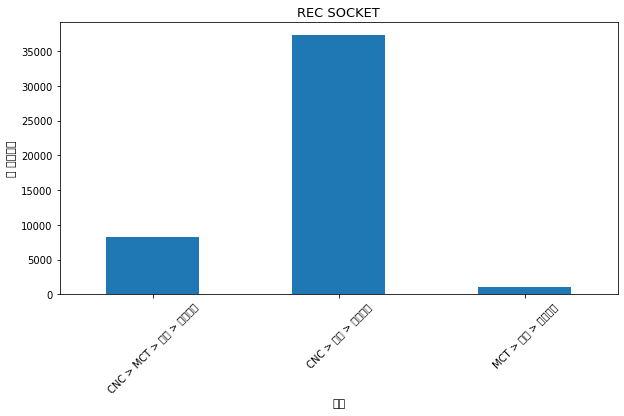

In [ ]:
ot = df_REC_SOCKET.groupby('전체공정').mean()['총 리드타임']
plot = ot.plot(kind='bar',figsize=(10,5))
plot.set_xlabel('공정',fontsize=11)
plot.set_ylabel('총 리드타임',fontsize=11)
plot.set_title('REC SOCKET',fontsize=13)
plot.set_xticklabels(labels=ot.index,rotation=45)

In [ ]:
pd.DataFrame(df_REC_SOCKET.groupby(['품명', "전체공정"]).mean()["총 리드타임"])

총 리드타임
품명         전체공정                               
REC SOCKET CNC > MCT > 세정 > 입고처리   8239.640303
           CNC > 세정 > 입고처리        37276.306250
           MCT > 세정 > 입고처리         1012.767000